##### <div style="text-align: right; font-family:Georgia;"> ***Sam VALLET et Thomas SINAPI*** </div>
## <center><span style="font-family:Georgia; font-size:3em;"> **Projet IAS** </span></center>


In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import csv
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


***
## **PRE PROCESSING :** ##
***

### **Premier dataset :** *"english_premier_league_data.csv" dont on conserve toutes les features statistiques* ###

In [295]:
df1 = pd.read_csv('Result_dataset/english_premier_league_data.csv', sep=';')
df1 = df1[df1['year'].isin([2016, 2017, 2018, 2019, 2020])] # on se restreint à ces années 
df1 = df1.rename(columns={'year': 'season'})
df1 = df1.drop(["Score","Half Time Score"], axis = 1)
df1 = df1.rename(columns={'Home Team Goals Scored': 'HT Goals Scored', 'Away Team Goals Scored': 'AT Goals Scored', # pour gagner de la place on remplace "HT" -> "HT" et "Away Team" -> "AT"
                          'Home Team Goals Conceeded': 'HT Goals Conceeded', 'Away Team Goals Conceeded': 'AT Goals Conceeded',
                          'Home Team Rating': 'HT Rating', 'Away Team Rating': 'AT Rating', 
                          'Home Team Possession %': 'HT Posses %', 'Away Team Possession %': 'AT Posses %',
                          'Home Team Off Target Shots': 'HT OffT Shots', 'Away Team Off Target Shots': 'AT OffT Shots',
                          'Home Team On Target Shots': 'HT OnT Shots', 'Away Team On Target Shots': 'AT OnT Shots',
                          'Home Team Total Shots': 'HT TotShots', 'Away Team Total Shots': 'AT TotShots',
                          'Home Team Blocked Shots': 'HT Block Shots', 'Away Team Blocked Shots': 'AT Block Shots',
                          'Home Team Corners': 'HT Corners', 'Away Team Corners': 'AT Corners',
                          'Home Team Throw Ins': 'HT Throw Ins', 'Away Team Throw Ins': 'AT Throw Ins',
                          'Home Team Pass Success %': 'HT Pass %', 'Away Team Pass Success %': 'AT Pass %',
                          'Home Team Aerials Won': 'HT Aerials Won', 'Away Team Aerials Won': 'AT Aerials Won',
                          'Home Team Clearances': 'HT Clear', 'Away Team Clearances': 'AT Clear',
                          'Home Team Fouls': 'HT Fouls', 'Away Team Fouls': 'AT Fouls',
                          'Home Team Second Yellow Cards': 'HT SecYellowC', 'Away Team Second Yellow Cards': 'AT SecYellowC',
                          'Home Team Red Cards': 'HT RedC', 'Away Team Red Cards': 'AT RedC',
                          'Home Team Yellow Cards': 'HT YellowC', 'Away Team Yellow Cards': 'AT YellowC',
                          })


df1.head()

,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season
760,HULL CITY,LEICESTER CITY,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,2,1,1,2,2016
761,EVERTON,TOTTENHAM,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,1,1,1,1,2016
762,MIDDLESBROUGH,STOKE,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1,1,1,1,2016
763,BURNLEY,SWANSEA,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,0,1,1,0,2016
764,SOUTHAMPTON,WATFORD,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1,1,1,1,2016


***
### **Second dataset :** *"spi_matches.csv" dont on extrait certains features* ###

In [296]:
df2 = pd.read_csv('SPI_dataset/spi_matches.csv', sep=';')

df2.dropna()

ligues = ['Barclays Premier League']
df2 = df2[df2['league'].isin(ligues)] # que la Premier League

df2 = df2[df2['season'].isin([2016, 2017, 2018, 2019, 2020])] #on se retreint à ces années
df2 = df2.rename(columns={'team1': 'Home Team', 'team2': 'Away Team', # on renomme les features comme df
                          'score1': 'HT Goals Scored', 'score2': 'AT Goals Scored', # pour gagner de la place on remplace "HT" -> "HT" et "Away Team" -> "AT"
                          'xg1': 'HT xG', 'xg2': 'AT xG',
                          'nsxg1': 'HT NSxG', 'nsxg2': 'AT NSxG',
                          'spi1': 'HT SPI Rate', 'spi2': 'AT SPI Rate',
                          'prob1': 'HT ProbWin', 'prob2': 'AT ProbWin',
                          'proj_score1': 'HT ProjScore', 'proj_score2': 'AT ProjScore',
                          'adj_score1': 'HT AdjScore', 'adj_score2': 'AT AdjScore',
                          'importance1': 'HT Importance', 'importance2': 'AT Importance',
                          })

df2 = df2.drop(['league_id', 'league'], axis = 1)


df2.head()



,season,date,Home Team,Away Team,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT Goals Scored,AT Goals Scored,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore
13,2016,2016-08-13,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
15,2016,2016-08-13,Hull,Leicester,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
17,2016,2016-08-13,Southampton,Watford,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
18,2016,2016-08-13,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
19,2016,2016-08-13,Burnley,Swansea,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05


In [297]:
data_set_1 = df1["Away Team"].unique() #liste des équipes de df1 sans doublons
data_set_2 = df2["Away Team"].unique() #liste des équipes de df2 sans doublons

In [309]:
fuzz.WRatio("TOTTENHAM","Tottenham Hotspur") # etudie la correspondance des string

90

In [299]:
# on veut identifier les noms d'equipes dans chaque dataframe pour que le merge se fasse correctement
def create_team_dict(data_set_1, data_set_2): #cree dictionnaire avec {nom dataset2 : nom dataset1}
    team_dict = {}
    for team2 in data_set_2:
        for team1 in data_set_1:
            ratio = fuzz.WRatio(team1, team2)
            if ratio >= 87: # ratio de 87 assure la correspondance pour CE dataset
                team_dict[team2] = team1
    return team_dict


In [300]:
team_names = create_team_dict(data_set_1,data_set_2)
df2['Home Team'] = df2['Home Team'].replace(team_names) # remplace nom dataset2 par nom dataset1 
df2['Away Team'] = df2['Away Team'].replace(team_names)
df2.head()

,season,date,Home Team,Away Team,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT Goals Scored,AT Goals Scored,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore
13,2016,2016-08-13,EVERTON,TOTTENHAM,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
15,2016,2016-08-13,HULL CITY,LEICESTER CITY,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
17,2016,2016-08-13,SOUTHAMPTON,WATFORD,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
18,2016,2016-08-13,CRYSTAL PALACE,WEST BROM,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
19,2016,2016-08-13,BURNLEY,SWANSEA,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05


***
### **FUSION DES DEUX DATAFRAMES** ###

In [301]:
# on merge par le score,les couples d'équipes et l'année 
# ON A DONC NOTRE DATAFRAME PROPRE

df = pd.merge(df1, df2, on=['season', 'Home Team', 'Away Team','HT Goals Scored', 'AT Goals Scored']) 
df.head()


,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season,date,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore
0,HULL CITY,LEICESTER CITY,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,2,1,1,2,2016,2016-08-13,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,0.85,2.77,0.17,1.25,2.10,1.05
1,EVERTON,TOTTENHAM,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,1,1,1,1,2016,2016-08-13,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,0.73,1.11,0.88,1.81,1.05,1.05
2,MIDDLESBROUGH,STOKE,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1,1,1,1,2016,2016-08-13,56.32,60.35,0.4380,0.2692,0.2927,1.30,1.01,33.9,32.5,1.40,0.55,1.13,1.06,1.05,1.05
3,BURNLEY,SWANSEA,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,0,1,1,0,2016,2016-08-13,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,1.24,1.84,1.71,1.56,0.00,1.05
4,SOUTHAMPTON,WATFORD,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1,1,1,1,2016,2016-08-13,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.05,0.22,1.52,0.41,1.05,1.05


In [302]:
df.shape

(1900, 54)

***IDENTIFICATION DES VALEURS MANQUANTES***


In [305]:
# df_copy = df.copy()

# # supprimer les valeurs manquantes
# df.dropna(inplace=True)

# # identifier les lignes supprimées
# deleted_rows = df_copy[~df_copy.isin(df)].dropna(how='all')
# print("Les lignes supprimées sont:")
# print(deleted_rows)


*(les valeurs manquantes proviennent uniquement des features "Importance" on peut donc les remplacer par la moyenne)*

In [306]:
# créer une copie du dataframe original
meanHTI = df["HT Importance"].mean()
meanATI = df["AT Importance"].mean()

df["HT Importance"] = df["HT Importance"].fillna(meanHTI)
df["AT Importance"] = df["AT Importance"].fillna(meanATI)


#### ***AJOUT DE COLONNES*** ####
---
*On ajoute une colonne pour l'écart de score de chaque match et l'issue du match.*

In [307]:
df = df.dropna() 
df["Score Difference"] = df["HT Goals Scored"] - df["AT Goals Scored"]  # on renseigne l'ecart de score
df["Match Outcome"] = df["Score Difference"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0)) # on renseigne l'issue du match (1/0/-1)

df['MatchWeek'] = (df.index // 10) + 1 # nouvelle colonne qui donne la "journée" du match (semaine)
col_to_move = df.pop('MatchWeek')
df.insert(0, 'MatchWeek', col_to_move)

col_to_move1 = df.pop('date')
df.insert(0, 'date', col_to_move1)
df["date"] = pd.to_datetime(df["date"]) # on convertie le type de "date"

df = df.sort_values("date") # on trie chronologiquement
df = df.round(2) # 2 chiffres après la virgule


*On ajoute à présent une nouvelle colonne pour chaque feature qui correspond à la moyenne de ce feature sur les 3 précédents matchs de chaque équipe.*  
   
***Ceci nous permettra d'avoir des informations supplémentaires sur l'état de forme et la dynamique d'une équipe !***

In [ ]:
# Fonction pour calculer la valeur moyenne d'un feature lors des 3 derniers matchs pour une équipe (feature de type "HT ..." ou "AT ....")
def get_HA_L3M(df, team, date, match_id, feature):
    previous_matches = df[(df['Home Team'] == team) | (df['Away Team'] == team)]
    previous_matches = previous_matches[previous_matches.index < match_id].sort_values('date', ascending=False).iloc[:3]
    f_score = 0
    for index, row in previous_matches.iterrows():
        if row['Home Team'] == team:
            f_score += row["HT "+ feature]
        else:
            f_score += row["AT "+ feature]
    return f_score/3

# Fonction pour calculer la valeur moyenne d'un feature lors des 3 derniers matchs pour une équipe (feature de type "HT ..." ou "AT ....")
def get_L3M(df, team, date, match_id, feature):
    previous_matches = df[(df['Home Team'] == team) | (df['Away Team'] == team)]
    previous_matches = previous_matches[previous_matches.index < match_id].sort_values('date', ascending=False).iloc[:3]
    f_score = 0
    for index, row in previous_matches.iterrows():
        if row['Home Team'] == team:
            f_score += row[feature]
        else:
            f_score -= row[feature] # (on fait bien - pour inverser les -1 des victoires à l'extérieur) ou la score difference
    return f_score/3



In [ ]:
featuresL3M = ["Goals Scored", "Goals Conceeded", "xG", "NSxG", "TotShots",
                "RedC", "Importance"]
fL3M = ["Match Outcome", "Score Difference"]

# on applque les fonctions à tous les features 

for feature in featuresL3M:
    df["HT " + feature + " L3M"] = df.apply(lambda x: get_HA_L3M(df, x['Home Team'], x['date'], x.name, feature), axis=1)
    df["AT " + feature + " L3M"] = df.apply(lambda x: get_HA_L3M(df, x['Away Team'], x['date'], x.name, feature), axis=1)
for feature in fL3M:
    df["HT " + feature + " L3M"] = df.apply(lambda x: get_L3M(df, x['Home Team'], x['date'], x.name, feature), axis=1)
    df["AT " + feature + " L3M"] = df.apply(lambda x: get_L3M(df, x['Away Team'], x['date'], x.name, feature), axis=1)
    

########################################################
# ATTENTION 38 SECONDES POUR L'EXECUTION DE LA CELLULE #
########################################################
    

In [ ]:
# EXEMPLE AVEC LIVERPOOL
liverpool_matches = df[(df["Home Team"]== "LIVERPOOL") | (df["Away Team"]== "LIVERPOOL") ]
liverpool_matches[["MatchWeek","Home Team", "Away Team", "Match Outcome", "HT Match Outcome L3M", "AT Match Outcome L3M","Score Difference", "HT Score Difference L3M", "AT Score Difference L3M"]].head(10)

,MatchWeek,Home Team,Away Team,Match Outcome,HT Match Outcome L3M,AT Match Outcome L3M,Score Difference,HT Score Difference L3M,AT Score Difference L3M
8,1,ARSENAL,LIVERPOOL,-1,0.0,0.0,-1,0.0,0.0
15,2,BURNLEY,LIVERPOOL,1,-0.3,0.3,2,-0.3,0.3
20,3,TOTTENHAM,LIVERPOOL,0,0.3,0.0,0,0.3,-0.3
37,4,LIVERPOOL,LEICESTER CITY,1,0.0,0.0,3,-0.3,0.0
40,5,CHELSEA,LIVERPOOL,-1,0.7,0.0,-1,1.3,0.3
51,6,LIVERPOOL,HULL CITY,1,0.7,-0.7,4,1.3,-1.3
61,7,SWANSEA,LIVERPOOL,-1,-0.7,1.0,-1,-1.0,2.7
79,8,LIVERPOOL,MANCHESTER UNITED,0,1.0,0.0,0,2.0,0.3
87,9,LIVERPOOL,WEST BROM,1,0.7,0.0,1,1.7,0.0
96,10,CRYSTAL PALACE,LIVERPOOL,-1,-0.7,0.7,-2,-1.0,0.7


In [308]:
df.head()

,date,MatchWeek,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore,Score Difference,Match Outcome
0,2016-08-13,1,HULL CITY,LEICESTER CITY,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,2,1,1,2,2016,53.57,66.81,0.35,0.36,0.29,1.16,1.24,38.1,22.2,0.85,2.77,0.17,1.25,2.10,1.05,1,1
1,2016-08-13,1,EVERTON,TOTTENHAM,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,1,1,1,1,2016,68.02,73.25,0.39,0.34,0.27,1.47,1.38,31.9,48.0,0.73,1.11,0.88,1.81,1.05,1.05,0,0
2,2016-08-13,1,MIDDLESBROUGH,STOKE,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1,1,1,1,2016,56.32,60.35,0.44,0.27,0.29,1.30,1.01,33.9,32.5,1.40,0.55,1.13,1.06,1.05,1.05,0,0
3,2016-08-13,1,BURNLEY,SWANSEA,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,0,1,1,0,2016,58.98,59.74,0.45,0.27,0.29,1.37,1.05,36.5,29.1,1.24,1.84,1.71,1.56,0.00,1.05,-1,-1
4,2016-08-13,1,SOUTHAMPTON,WATFORD,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1,1,1,1,2016,69.49,59.33,0.58,0.19,0.24,1.91,1.05,34.1,30.7,1.05,0.22,1.52,0.41,1.05,1.05,0,0


***
### **DATA VISUALIZATION "df" :** ### 
***


In [278]:
# df.mean()
df.describe()

,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore,Score Difference,Match Outcome
count,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000
mean,5.356153,6.416604,6.220204,51.203117,48.796883,5.218700,4.662010,13.579796,3.711445,5.693176,21.899516,78.305212,18.463729,20.508329,10.629232,1.580333,0.018270,0.031166,4.310048,3.934981,11.260613,3.031703,4.670070,21.130038,77.191295,18.427727,24.292316,10.784524,1.706072,0.027405,0.037077,1.509404,1.236969,1.236969,1.509404,2018.035465,70.244444,70.207566,0.450588,0.313629,0.235785,1.572219,1.224987,35.163998,33.967276,1.553783,1.277786,1.540220,1.269017,1.513584,1.247184,0.272434,0.122515
std,1.670565,1.000451,0.995096,13.077750,13.077750,2.697469,2.657147,5.680915,2.541912,3.065048,6.210562,7.746128,7.461471,9.655494,3.435126,1.235505,0.133961,0.179893,2.365307,2.343503,4.946738,2.219795,2.736003,6.254054,7.756090,7.353133,10.572509,3.525529,1.266657,0.163303,0.200056,1.306947,1.212058,1.212058,1.306947,1.399243,11.896731,11.867508,0.201200,0.184224,0.051424,0.528954,0.518558,26.916490,26.294199,0.905038,0.797460,0.802761,0.674533,1.274706,1.182860,1.914135,0.871924
min,1.700000,2.400000,1.500000,18.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,51.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,48.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,42.970000,43.510000,0.028300,0.008000,0.053100,0.410000,0.200000,0.000000,0.000000,0.000000,0.000000,0.050000,0.030000,0.000000,0.000000,-9.000000,-1.000000
25%,4.100000,5.700000,5.500000,42.000000,39.000000,3.000000,3.000000,10.000000,2.000000,3.000000,18.000000,73.000000,13.000000,14.000000,8.000000,1.000000,0.000000,0.000000,3.000000,2.000000,8.000000,1.000000,3.000000,17.000000,72.000000,13.000000,17.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2017.000000,60.870000,60.580000,0.315500,0.185700,0.209900,1.220000,0.890000,12.100000,10.700000,0.850000,0.680000,0.980000,0.780000,1.050000,0.000000,-1.000000,-1.000000
50%,5.300000,6.400000,6.200000,51.000000,49.000000,5.000000,4.000000,13.000000,3.000000,5.000000,21.000000,79.000000,18.000000,19.000000,10.000000,1.000000,0.000000,0.000000,4.000000,4.000000,11.000000,3.000000,4.000000,21.000000,78.000000,18.000000,23.000000,11.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,69.000000,68.890000,0.439900,0.285900,0.250600,1.460000,1.150000,32.000000,31.500000,1.410000,1.130000,1.420000,1.160000,1.050000,1.050000,0.000000,0.000000
75%,6.400000,7.000000,6.800000,61.000000,58.000000,7.000000,6.000000,17.000000,5.000000,8.000000,26.000000,84.000000,23.000000,26.000000,13.000000,2.000000,0.000000,0.000000,6.000000,5.000000,14.000000,4.000000,6.000000,25.000000,83.0

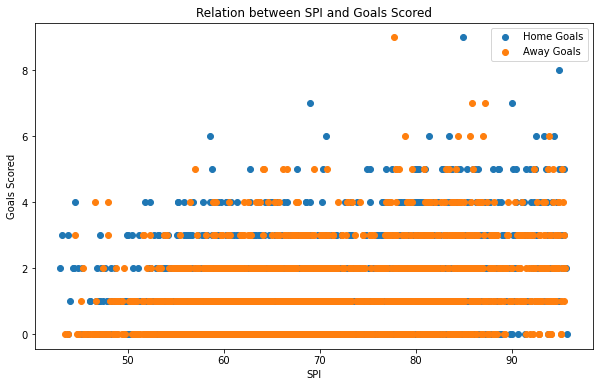

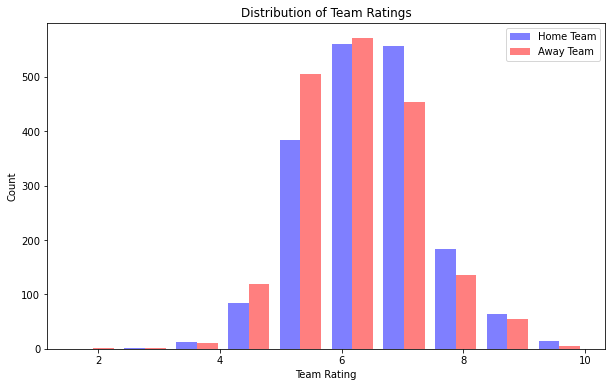

In [310]:
# GRAPHES DE LA RELATION ENTRE SPI RATE ET LE NBRE BUTS
plt.subplots(figsize=(10, 6))
plt.scatter(df['HT SPI Rate'], df['HT Goals Scored'], label='Home Goals')
plt.scatter(df['AT SPI Rate'], df['AT Goals Scored'], label='Away Goals')

plt.title('Relation between SPI and Goals Scored')
plt.xlabel('SPI')
plt.ylabel('Goals Scored')
plt.legend()

plt.show()


#####
plt.subplots(figsize=(10, 6))
plt.hist([df['HT Rating'], df['AT Rating']], color=['blue', 'red'], alpha=0.5, bins=10)
plt.xlabel('Team Rating')
plt.ylabel('Count')
plt.title('Distribution of Team Ratings')
plt.legend(['Home Team', 'Away Team'])
plt.show()



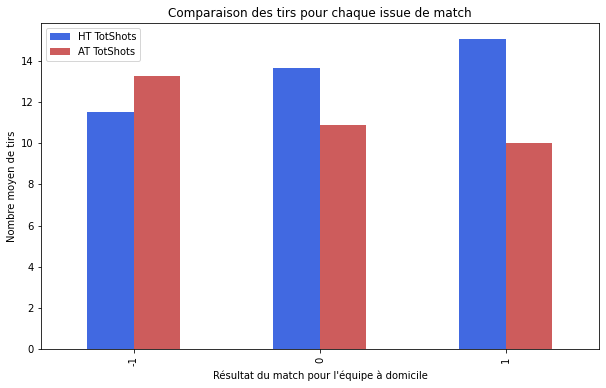

In [311]:
# Graphique en barres pour comparer les tirs de chaque équipe pour chaque issue de match
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('Match Outcome').agg({'HT TotShots': 'mean', 'AT TotShots': 'mean'}).plot(kind='bar', ax=ax, color=['royalblue', 'indianred'])
ax.set_xlabel('Résultat du match pour l\'équipe à domicile')
ax.set_ylabel('Nombre moyen de tirs')
ax.set_title('Comparaison des tirs pour chaque issue de match')
plt.show()


## **CREATION D'UN NOUVEAU DATAFRAME** ##
***Moyenne des features pour chaque équipe***

In [312]:
#on copie de df pour faire un autre pour chaque équipe
df_matches = df
df_teams = pd.DataFrame()

for team in df_matches["Home Team"].unique(): # on boucle sur chaque équipe unique 

    df_current_team = pd.DataFrame()  # on prend un nouveau DataFrame pour l'équipe courante de la boucle 

    df_home_matches = df_matches[df_matches["Home Team"] == team] # match à domicile de l'équipe courante
    df_away_matches = df_matches[df_matches["Away Team"] == team] # match à l'exterieur de l'équipe courante
    df_all_matches = pd.concat([df_home_matches, df_away_matches]) # on assemble pour avoir tous les matchs de l'équipe courante

    df_current_team["Team"] = [team]
    # on crée une colonne average pour chaque features (*)
    average_possession = (df_home_matches["HT Posses %"].mean() + df_away_matches["AT Posses %"].mean()) / 2
    df_current_team["Average Posses"] = average_possession

    # Features à calculer la moyenne pour chaque équipe
    featuresHA = ["Goals Scored", "Goals Conceeded", "xG", "NSxG", "TotShots", "OffT Shots", "OnT Shots", "Block Shots", "Pass %", 
            "Corners", "Throw Ins", "Aerials Won", "Clear", 
            "Fouls", "YellowC", "SecYellowC", "RedC", "Importance", "ProjScore", "AdjScore", "SPI Rate", "ProbWin"]

    # on repete le processus (*) pour chaque feature de type ("HT" ou "Away Team")
    for feature in featuresHA:
        home_feature_mean = df_home_matches["HT " + feature].mean()  # moyenne pour les matchs à domicile
        away_feature_mean = df_away_matches["AT " + feature].mean()  # moyenne pour les matchs à l'extérieur

        avg_feature = (home_feature_mean + away_feature_mean) / 2 # moyenne pour tous les matchs
        df_current_team["Average " + feature] = avg_feature

    # on fait la même chose pour les issues de match et la différence de buts
    features = ["Match Outcome", "Score Difference"]
    
    for feature in features:

        home_feature_mean = df_home_matches[feature].mean()  # moyenne pour les matchs à domicile
        away_feature_mean = df_away_matches[feature].mean()  # moyenne pour les matchs à l'extérieur

        avg_feature = (home_feature_mean - away_feature_mean) / 2 # moyenne pour tous les matchs (on fait bien - pour inverser les -1 des victoires à l'extérieur)
        df_current_team["Average " + feature] = avg_feature
      
    df_teams = pd.concat([df_teams, df_current_team], ignore_index=True) # on ajoute la ligne pour l'équipe courante au DF de toutes les équipes


***CREATION DU DATAFRAME DE TOUTES LES CONFRONTATIONS***

In [283]:
matchs = df[["Home Team","Away Team", "Match Outcome"]]
matchs.head()

,Home Team,Away Team,Match Outcome
0,HULL CITY,LEICESTER CITY,1
1,EVERTON,TOTTENHAM,0
2,MIDDLESBROUGH,STOKE,0
3,BURNLEY,SWANSEA,-1
4,SOUTHAMPTON,WATFORD,0


***
### **DATA VISUALIZATION "df_teams" :** ### 
***


In [284]:
df_teams.sort_values("Team")

,Team,Average Posses,Average Goals Scored,Average Goals Conceeded,Average xG,Average NSxG,Average TotShots,Average OffT Shots,Average OnT Shots,Average Block Shots,Average Pass %,Average Corners,Average Throw Ins,Average Aerials Won,Average Clear,Average Fouls,Average YellowC,Average SecYellowC,Average RedC,Average Importance,Average ProjScore,Average AdjScore,Average SPI Rate,Average ProbWin,Average Match Outcome,Average Score Difference
8,ARSENAL,57.270979,1.749766,1.233462,1.631605,1.859326,12.975806,4.743338,4.731300,3.512038,83.187997,5.736033,19.871085,14.884292,19.664095,10.295407,1.740825,0.016187,0.075736,44.308006,1.797868,1.745293,80.276357,0.499393,0.204009,0.516304
26,ASTON VILLA,45.811522,1.281294,1.507112,1.383578,1.272368,12.714083,4.858108,4.415007,3.467283,76.756757,5.380512,20.579659,18.467639,20.581437,11.645448,1.799431,0.066856,0.000000,37.907788,1.236067,1.294705,68.890235,0.310568,-0.145804,-0.225818
7,BOURNEMOUTH,47.573243,1.276486,1.730000,1.319046,1.313114,11.556667,4.406216,3.967658,3.196216,76.796757,5.276306,21.764685,18.176486,26.503063,9.348198,1.624775,0.033604,0.013423,22.282937,1.243931,1.280244,62.328902,0.299113,-0.193243,-0.453514
20,BRIGHTON,47.276316,0.973684,1.407895,1.191382,1.207303,11.197368,4.730263,3.361842,3.105263,77.000000,4.710526,21.671053,18.782895,21.453947,11.105263,1.447368,0.026316,0.065789,25.067763,1.063355,0.998618,63.984276,0.281812,-0.197368,-0.434211
3,BURNLEY,41.462649,1.047872,1.402209,1.132214,1.166517,10.043079,4.220072,3.325345,2.513795,69.260346,4.220072,21.648702,24.866904,26.919278,10.135434,1.688684,0.005495,0.010989,21.198340,1.079697,1.062717,63.371404,0.284560,-0.120178,-0.354337
25,CARDIFF,34.842105,0.894737,1.815789,1.086316,1.078421,10.973684,4.710526,3.315789,3.000000,63.236842,4.421053,21.026316,25.815789,25.736842,9.842105,1.736842,0.000000,0.026316,47.973684,1.021053,0.922368,58.423684,0.247026,-0.368421,-0.921053
9,CHELSEA,59.376344,1.774194,1.043011,1.785968,1.918602,15.655914,5.564516,5.548387,4.543011,85.102151,5.994624,20.505376,15.489247,17.704301,10.112903,1.440860,0.016129,0.021505,65.274731,1.929677,1.771452,84.967527,0.584680,0.349462,0.731183
5,CRYSTAL PALACE,44.039350,1.149623,1.496397,1.186126,1.270318,11.252745,4.532887,3.632578,3.108671,74.438744,4.976436,22.136067,19.548216,23.587337,11.089682,1.716255,0.010638,0.021391,20.924897,1.132987,1.145665,64.705635,0.291899,-0.138927,-0.346774
1,EVERTON,49.080188,1.311370,1.335907,1.357676,1.288334,11.700812,4.483070,4.162034,3.077099,77.177362,4.858842,21.578014,20.166266,24.340254,11.640814,1.646648,0.031972,0.031972,15.027906,1.317620,1.315378,70.429949,0.359585,0.027740,-0.024537
23,FULHAM,49.289474,0.802632,1.763158,1.096974,1.193947,11.789474,5.000000,3.697368,3.092105,79.684211,4.276316,20.381579,18.197368,22.421053,11.921053,1.802632,0.026316,0.039474,37.500000,1.075921,0.835395,62.520263,0.265237,-0.447368,-0.960526


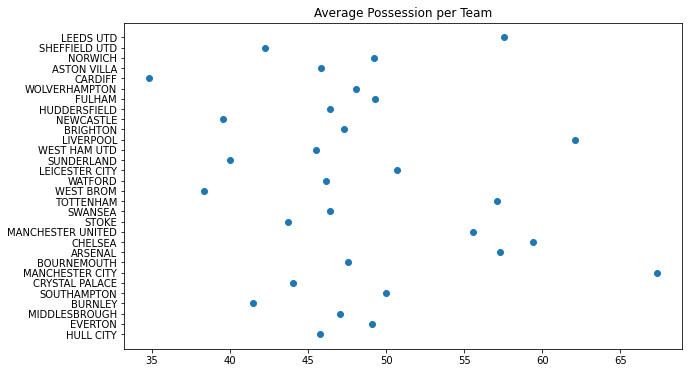

In [285]:
plt.subplots(figsize=(10, 6))
plt.scatter(x="Average Posses", y="Team", data=df_teams)
plt.title("Average Possession per Team")
plt.show()


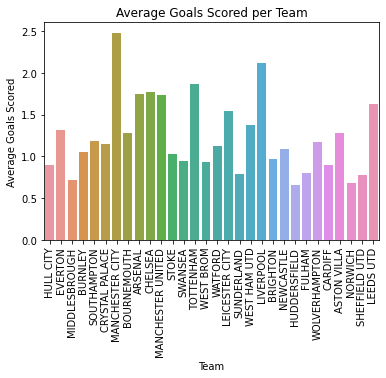

In [286]:
sns.barplot(x="Team", y="Average Goals Scored", data=df_teams)
plt.xticks(rotation=90)
plt.title("Average Goals Scored per Team")
plt.show()


***
### **ENCODAGE :** ###
***

***POUR LE DATAFRAME DE BASES***

In [288]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# encodeur sur les noms des équipes
encoder.fit(df[["Home Team", "Away Team"]])

# transformation des noms des équipes en nombres
df[["Home Team", "Away Team"]] = encoder.transform(df[["Home Team", "Away Team"]])
df[["Home Team", "Away Team"]].head()

,Home Team,Away Team
0,11.0,13.0
1,8.0,25.0
2,17.0,22.0
3,4.0,24.0
4,21.0,26.0


***POUR LE DATAFRAME DE LA MOYENNE DES FEATURES POUR CHAQUE EQUIPE***

In [289]:
encoder.fit(df_teams[["Team"]])
df_teams["Team"] = encoder.transform(df_teams[["Team"]])
df_teams[["Team"]].head()

,Team
0,11.0
1,8.0
2,17.0
3,4.0
4,21.0


---
---

In [290]:
df =df.drop("HT Goals Scored", axis = 1)
df = df.drop("AT Goals Scored", axis = 1)
df = df.drop("HT Goals Conceeded", axis = 1)
df = df.drop("AT Goals Conceeded", axis = 1)
df.head()

,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,season,date,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore,Score Difference,Match Outcome
0,11.0,13.0,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,2016,2016-08-13,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,0.85,2.77,0.17,1.25,2.10,1.05,1,1
1,8.0,25.0,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,2016,2016-08-13,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,0.73,1.11,0.88,1.81,1.05,1.05,0,0
2,17.0,22.0,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,2016,2016-08-13,56.32,60.35,0.4380,0.2692,0.2927,1.30,1.01,33.9,32.5,1.40,0.55,1.13,1.06,1.05,1.05,0,0
3,4.0,24.0,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,2016,2016-08-13,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,1.24,1.84,1.71,1.56,0.00,1.05,-1,-1
4,21.0,26.0,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,2016,2016-08-13,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.05,0.22,1.52,0.41,1.05,1.05,0,0


In [291]:
features = ['season', 'Home Team', 'Away Team', 'Match Excitement',
       'HT Rating', 'AT Rating', 'HT Posses %',
       'AT Posses %', 'HT OffT Shots',
       'HT OnT Shots', 'HT TotShots',
       'HT Block Shots', 'HT Corners', 'HT Throw Ins',
       'HT Pass %', 'HT Aerials Won',
       'HT Clear', 'HT Fouls', 'HT YellowC',
       'HT SecYellowC', 'HT RedC',
       'AT OffT Shots', 'AT OnT Shots',
       'AT TotShots', 'AT Block Shots', 'AT Corners',
       'AT Throw Ins', 'AT Pass %',
       'AT Aerials Won', 'AT Clear', 'AT Fouls',
       'AT YellowC', 'AT SecYellowC',
       'AT RedC', 'HT xG', 'AT xG',
       'HT NSxG', 'AT NSxG', 'HT SPI Rate',
       'AT SPI Rate']

In [292]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df[features], df["Match Outcome"], test_size=0.2, random_state=42)

# Entraînement d'un modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)

# scores = cross_val_score(clf, df[features], df["Score Difference"], cv=5)
# print("Cross-validation scores:", scores*100)
# print("Average score:", scores.mean()*100)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))



Précision : 87.67%


In [91]:
print(X_train.shape)
print(X_test.shape)

(1488, 40)
(373, 40)


In [92]:
correct_predictions = []
incorrect_predictions = []

for i in range(len(y_pred)):
    if y_pred[i] == y_test.values[i]:
        correct_predictions.append(X_test.index[i])
    else:
        incorrect_predictions.append(X_test.index[i])

print("Nombre de prédictions correctes :", len(correct_predictions))
print("Nombre de prédictions incorrectes :", len(incorrect_predictions))

# Affichage des prédictions correctes
# print("Prédictions correctes :")
# for i in correct_predictions:
#     print("Match", i, "prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])

# # Affichage des prédictions incorrectes
# print("Prédictions incorrectes :")
# for i in incorrect_predictions:
#     print("Match", i, "prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])


Nombre de prédictions correctes : 327
Nombre de prédictions incorrectes : 46


In [93]:
# Créer un DataFrame avec les colonnes "HT" et "Away Team" de X_test
teams_encoded = X_test[["HT", "Away Team"]]

# Utiliser l'encodeur pour inverser la transformation sur les colonnes "HT" et "Away Team"
teams_decoded = encoder.inverse_transform(teams_encoded)

# Remplacer les colonnes "HT" et "Away Team" de X_test avec les noms d'équipe décodés
X_test[["HT", "Away Team"]] = teams_decoded

# Afficher X_test pour vérifier que les noms d'équipe ont été décodés avec succès
print(X_test[["HT", "Away Team"]].head())


           Home Team       Away Team
253   CRYSTAL PALACE   MIDDLESBROUGH
486        TOTTENHAM  CRYSTAL PALACE
1130          FULHAM       NEWCASTLE
1611        BRIGHTON       LIVERPOOL
447          ARSENAL        BRIGHTON


In [117]:
# print("Prédictions correctes :", len(correct_predictions))
# for i in correct_predictions:
#     print("Match :", X_test["HT"].values[X_test.index.get_loc(i)],"-", X_test["Away Team"].values[X_test.index.get_loc(i)],"prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])

# Affichage des prédictions incorrectes
# print("Prédictions incorrectes :" , len(incorrect_predictions))
print("Match :", X_test["HT"].values[X_test.index.get_loc(incorrect_predictions[0])],"-", X_test["Away Team"].values[X_test.index.get_loc(incorrect_predictions[0])] ,"Prédiction :", y_pred[X_test.index.get_loc(incorrect_predictions[0])], " Résultat réel :", y_test[incorrect_predictions[0]])
print("Match :", X_test["HT"].values[X_test.index.get_loc(incorrect_predictions[0])],"-", X_test["Away Team"].values[X_test.index.get_loc(incorrect_predictions[0])] ,"Probas :", y_pred2[X_test.index.get_loc(incorrect_predictions[0])])

print("Match :", X_test["HT"].values[X_test.index.get_loc(incorrect_predictions[1])],"-", X_test["Away Team"].values[X_test.index.get_loc(incorrect_predictions[1])] ,"Prédiction :", y_pred[X_test.index.get_loc(incorrect_predictions[1])], " Résultat réel :", y_test[incorrect_predictions[1]])
print("Match :", X_test["HT"].values[X_test.index.get_loc(incorrect_predictions[1])],"-", X_test["Away Team"].values[X_test.index.get_loc(incorrect_predictions[1])] ,"Probas :", y_pred2[X_test.index.get_loc(incorrect_predictions[1])])

# for i in incorrect_predictions:
#     print("Match :", X_test["HT"].values[X_test.index.get_loc(i)],"-", X_test["Away Team"].values[X_test.index.get_loc(i)] ,"prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])
#     print("Match :", X_test["HT"].values[X_test.index.get_loc(i)],"-", X_test["Away Team"].values[X_test.index.get_loc(i)] ,"proba :", y_pred2[X_test.index.get_loc(i)])

Match : CRYSTAL PALACE - MIDDLESBROUGH Prédiction : 0  Résultat réel : 1
Match : CRYSTAL PALACE - MIDDLESBROUGH Probas : [0.13 0.61 0.26]
Match : TOTTENHAM - CRYSTAL PALACE Prédiction : 0  Résultat réel : 1
Match : TOTTENHAM - CRYSTAL PALACE Probas : [0.09 0.57 0.34]


In [32]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.predict_proba(X_train.head())


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
X_train = df[features]
y_train = df["Match Outcome"]
X_train.head()


,season,Home Team,Away Team,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,Home Team Corners,Home Team Throw Ins,Home Team Pass Success %,Home Team Aerials Won,Home Team Clearances,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Off Target Shots,Away Team On Target Shots,Away Team Total Shots,Away Team Blocked Shots,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team xG,Away Team xG,Home Team NSxG,Away Team NSxG,Home Team SPI Rate,Away Team SPI Rate
0,2016,11.0,13.0,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,0.85,2.77,0.17,1.25,53.57,66.81
1,2016,8.0,25.0,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,0.73,1.11,0.88,1.81,68.02,73.25
2,2016,17.0,22.0,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1.40,0.55,1.13,1.06,56.32,60.35
3,2016,4.0,24.0,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,1.24,1.84,1.71,1.56,58.98,59.74
4,2016,21.0,26.0,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1.05,0.22,1.52,0.41,69.49,59.33


In [21]:
from gensim.models import Word2Vec

# Charger les données
data = pd.read_csv('IAS_dataset.csv', sep=';')

# Obtenir les noms d'équipes uniques
unique_teams = list(set(data['HT']).union(set(data['Away Team'])))

# Créer les représentations vectorielles
team_embeddings = Word2Vec([unique_teams], vector_size=100, min_count=1, window=5, sg=1)


# Obtenir la représentation vectorielle d'une équipe

# for team in unique_teams:
#     print(team, team_embeddings.wv.get_vector(team))

team_embeddings.wv.get_vector('ARSENAL')
len(team_embeddings.wv.get_vector('ARSENAL'))



100

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Créer les données d'entraînement et de test
X = []
y = []
for i in range(len(data)):
    home_team = data.loc[i, 'HT']
    away_team = data.loc[i, 'Away Team']
    home_team_embedding = team_embeddings.wv[home_team]
    away_team_embedding = team_embeddings.wv[away_team]
    X.append(np.concatenate((home_team_embedding, away_team_embedding)))
    y.append(int(data.loc[i, 'HT Goals Scored'] > data.loc[i, 'Away Team Goals Scored']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression logistique
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Évaluer le modèle
accuracy = lr.score(X_test, y_test)
print('Accuracy:', accuracy)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 380